In [30]:
from lxml import etree
import tensorflow as tf

In [29]:
path = 'data/VOCdevkit/VOC2007/Annotations/000007.xml'

In [39]:
with tf.gfile.GFile(path, 'r') as fid:
    xml_str = fid.read()
xml = etree.fromstring(xml_str)

In [41]:
def xml_to_dict(xml):
    if len(xml) == 0:
        return {xml.tag: xml.text}
    result = {}
    for child in xml:
        child_result = xml_to_dict(child)
        if child.tag != 'object':
            result[child.tag] = child_result[child.tag]
        else:
            if child.tag not in result:
                result[child.tag] = []
            result[child.tag].append(child_result[child.tag])
    return {xml.tag: result}

In [44]:
xml_to_dict(xml)['annotation']['object']

[{'bndbox': {'xmax': '500', 'xmin': '141', 'ymax': '330', 'ymin': '50'},
  'difficult': '0',
  'name': 'car',
  'pose': 'Unspecified',
  'truncated': '1'}]

### Sliding window

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# number of pixels form a block
# number of blocks form a window
box = np.zeros((64, 64), dtype=np.uint8)

# total block number
pix_per_block = 2
x_blocks = box.shape[1] // pix_per_block
y_blocks = box.shape[0] // pix_per_block

# block number per window
window_size = 16
n_blocks_per_window = window_size // pix_per_block

# window sliding steps(block unit)
steps_per_window = 3
x_steps = (x_blocks - n_blocks_per_window +1) // steps_per_window +1
y_steps = (y_blocks - n_blocks_per_window +1) // steps_per_window +1

print "shape: {}, total_x_blocks: {}, total_x_blocks_pwindow: {}, x_window_sliding_steps: {}".format(box.shape[1], x_blocks, x_blocks_per_window, x_steps)

shape: 64, total_x_blocks: 32, total_x_blocks_pwindow: 4, x_window_sliding_steps: 9


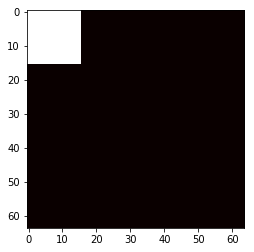

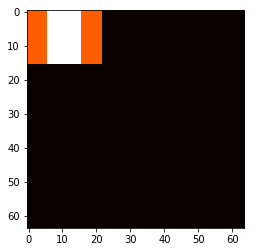

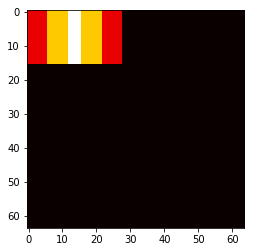

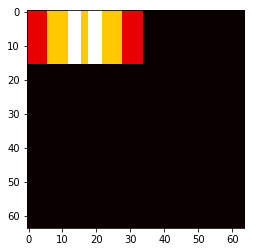

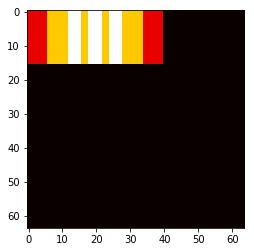

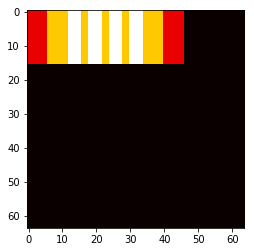

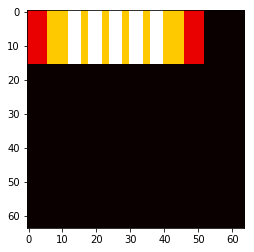

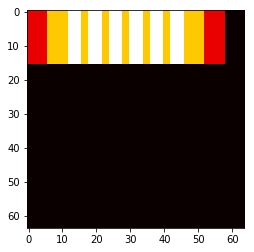

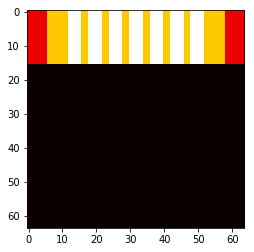

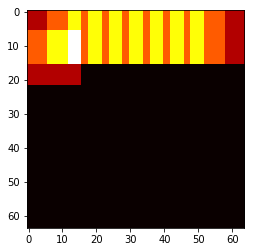

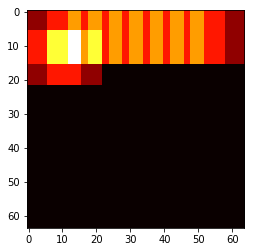

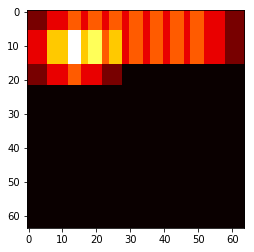

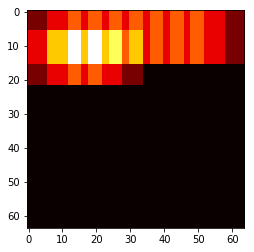

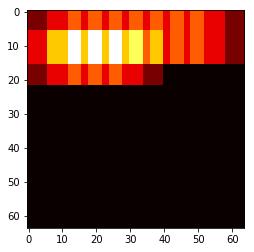

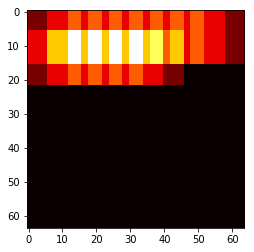

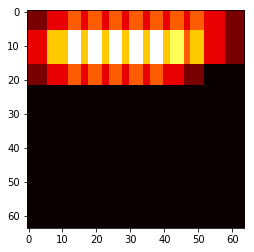

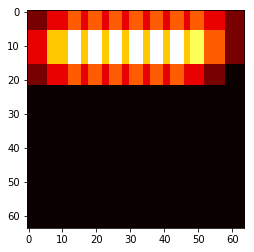

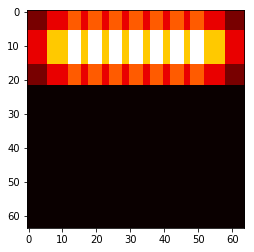

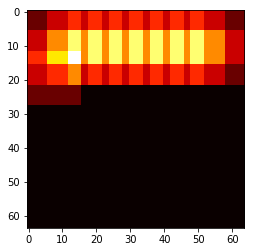

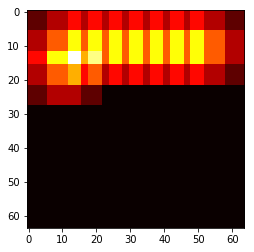

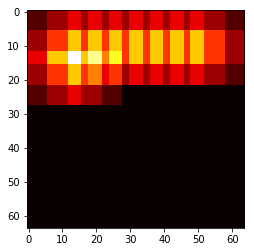

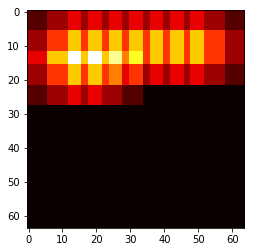

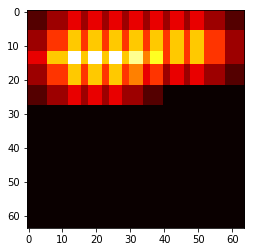

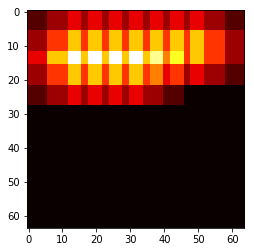

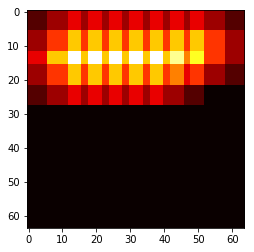

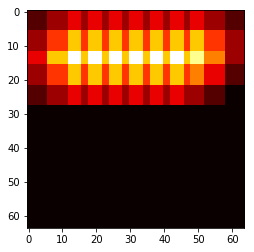

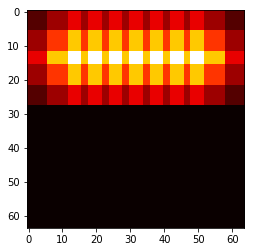

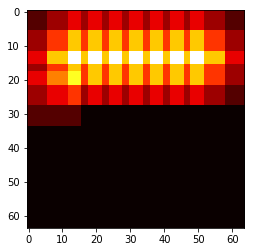

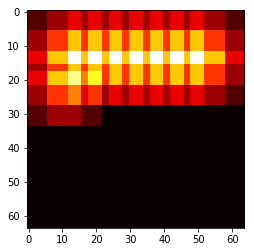

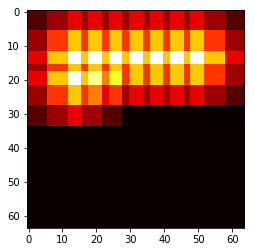

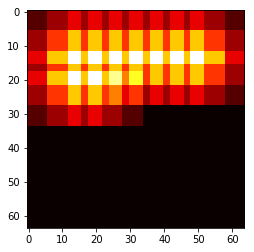

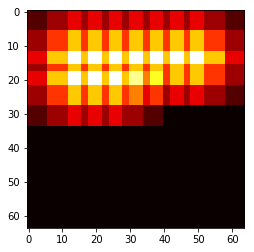

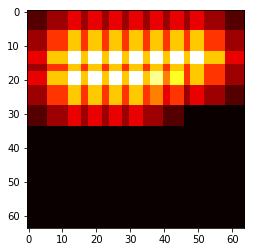

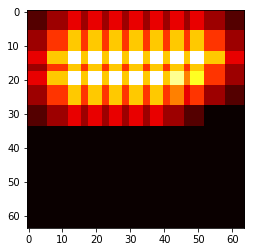

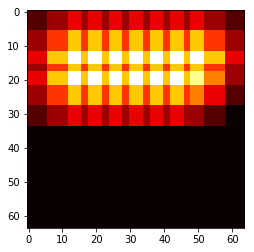

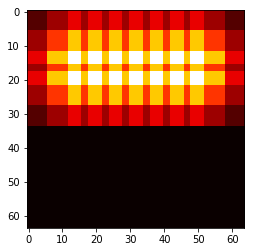

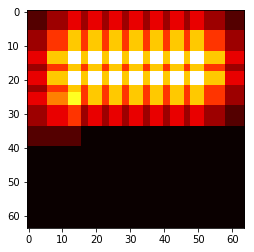

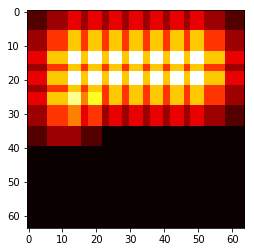

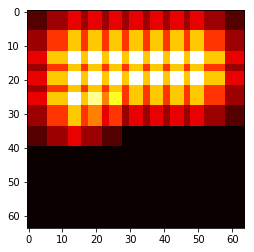

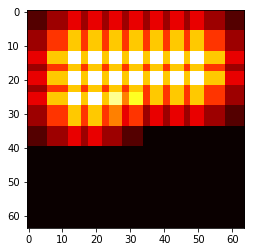

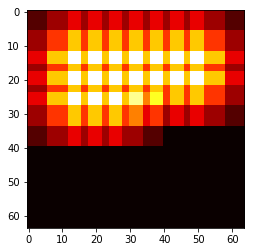

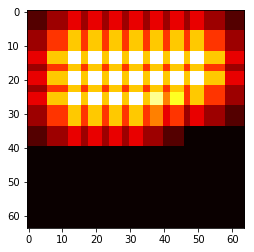

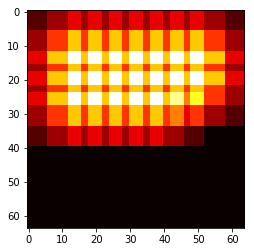

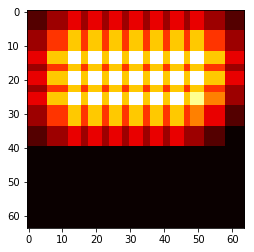

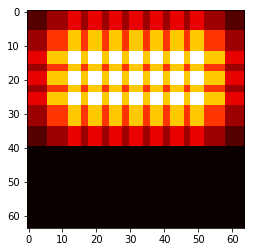

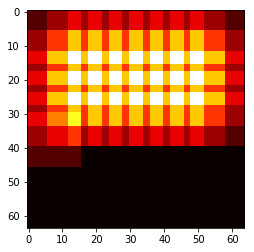

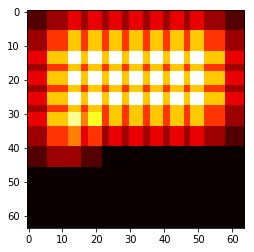

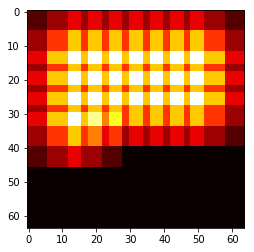

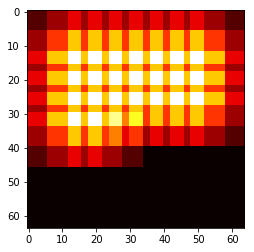

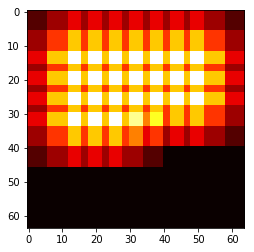

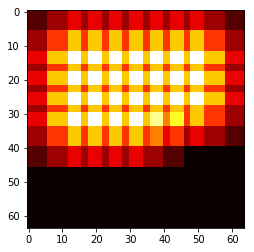

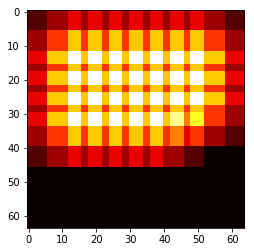

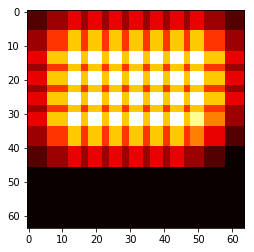

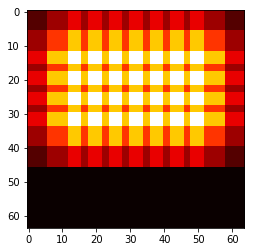

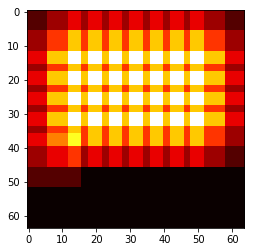

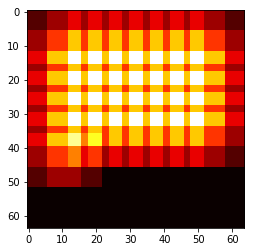

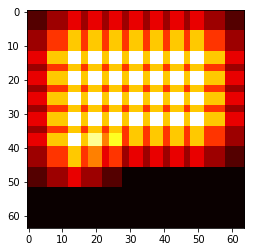

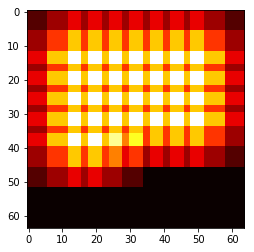

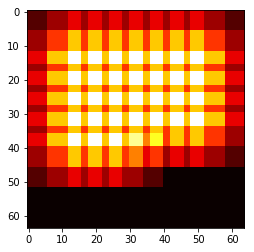

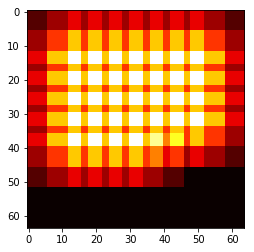

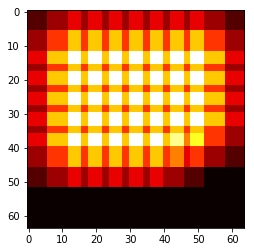

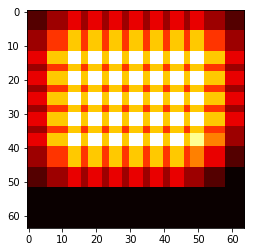

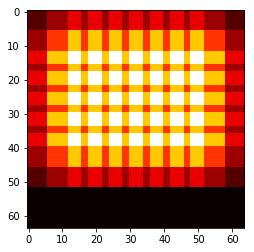

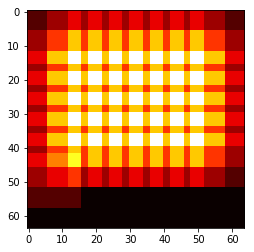

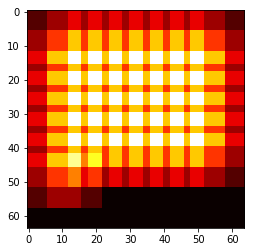

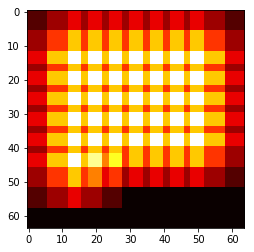

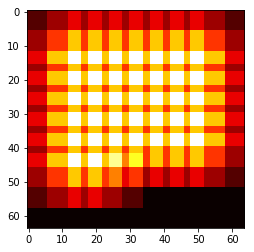

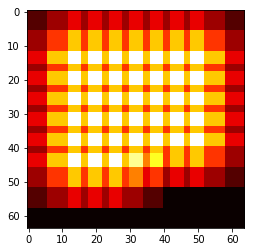

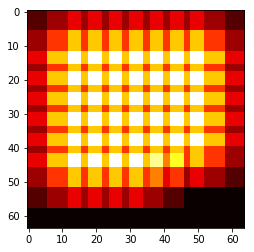

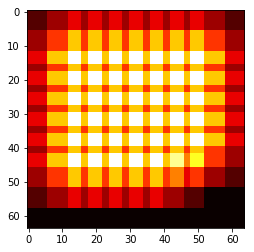

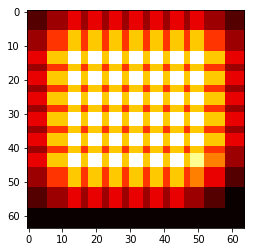

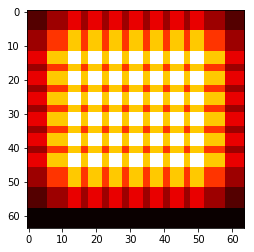

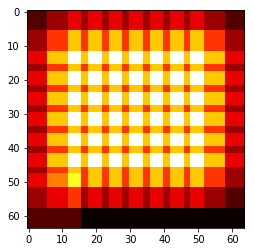

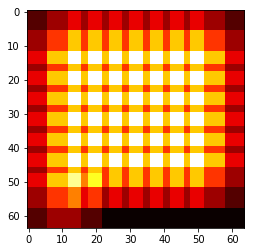

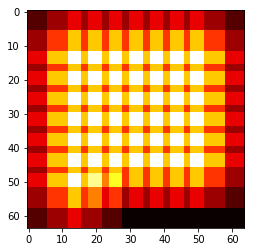

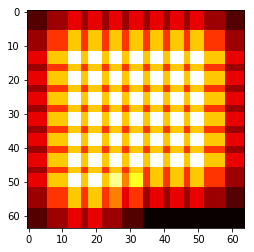

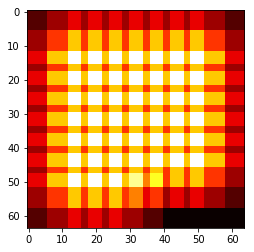

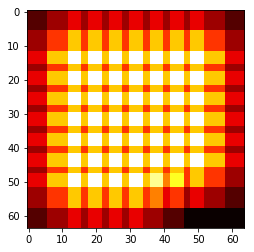

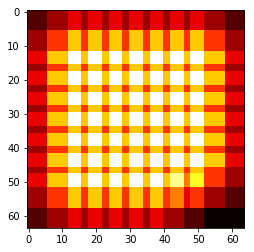

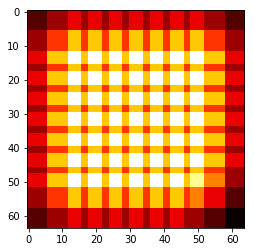

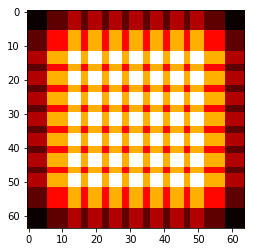

In [32]:
_box = np.copy(box)

for j in range(y_steps):
    for i in range(x_steps):
        sx = i*steps_per_window*pix_per_block
        sy = j*steps_per_window*pix_per_block
        _box[sy:sy+window_size, sx:sx+window_size] += 1
        plt.imshow(_box, cmap='hot')
        plt.show()